In [ ]:
image_id1 = 911
image_id2 = 105
image_id3 = 1395
image_id4 = 1120
image_id5 = 1390
image_id6 = 689
image_id7 = 1264
image_id8 = 662

In [ ]:
file_name = {
    "file_name1" : "0047.jpg",
    "file_name2" : "0200.jpg",
    "file_name3" : "00303.jpg",
    "file_name4" : "22-203.jpg",      
    "file_name5" : "764-11.jpg",
    "file_name6" : "00080.jpg",
    "file_name7" : "00269.jpg",
    "file_name8" : "001142.jpg"}

In [3]:
from pathlib import Path
from PIL import Image
import numpy as np
import torch
from panopticapi.utils import rgb2id
from util.box_ops import masks_to_boxes
import json

coco_path = "/home/reuben/Atom360/Learning/data/dataset/images"
coco_panoptic_path = "panoptic/"
idx = 711

/home/reuben/anaconda3/envs/pytorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
image_set='train'

img_folder_root = Path(coco_path)
ann_folder_root = Path(coco_panoptic_path)
assert img_folder_root.exists(), f'provided COCO path {img_folder_root} does not exist'
assert ann_folder_root.exists(), f'provided COCO path {ann_folder_root} does not exist'
mode = 'panoptic'   
PATHS = {
        "train": ("train2017", Path("annotations") / f'{mode}_train2017.json'),
        "val": ("val2017", Path("annotations") / f'{mode}_val2017.json'),
    }

img_folder, ann_file = PATHS[image_set]
img_folder_path = img_folder_root #/ img_folder
ann_folder = ann_folder_root / f'{mode}_{img_folder}'
ann_file = ann_folder_root / ann_file

In [8]:
with open(ann_file, 'r') as f:
    coco_ann = json.load(f)
ann_info = coco_ann['annotations'][idx] if "annotations" in coco_ann else coco_ann['images'][idx]
img_path = Path(img_folder_path) / ann_info['file_name'].replace('.png', '.jpg')
ann_path = Path(ann_folder) / ann_info['file_name']
img = Image.open(img_path).convert('RGB')
w, h = img.size
if "segments_info" in ann_info:
    masks = np.asarray(Image.open(ann_path), dtype=np.uint32)
    masks = rgb2id(masks)
    ids = np.array([ann['id'] for ann in ann_info['segments_info']])
    masks = masks == ids[:, None, None]
    masks = torch.as_tensor(masks, dtype=torch.uint8)
    # labels = torch.tensor([ann['category_id'] for ann in ann_info['segments_info']], dtype=torch.int64
target = {}
target['image_id'] = torch.tensor([ann_info['image_id'] if "image_id" in ann_info else ann_info["id"]])
# if self.return_masks:
target['masks'] = masks
# target['labels'] = label
target["boxes"] = masks_to_boxes(masks)

/home/reuben/anaconda3/envs/pytorch/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


CLASSES [11829830]
[557]


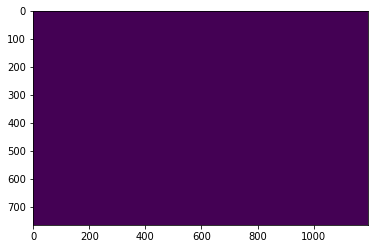

In [19]:
import matplotlib.pyplot as plt

masks = np.asarray(Image.open(ann_path), dtype=np.uint32)
masks = rgb2id(masks)
print("CLASSES", np.unique(masks))
print(np.array([ann['id'] for ann in ann_info['segments_info']]))
plt.imshow(masks)

In [12]:
masks.shape

torch.Size([1, 764, 1194])

In [11]:

plt.imshow(masks)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)